## Outline

# Reading of data

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pylab, gridspec
from collections import Counter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [50]:
# Data set Japanese Credit Screening: http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
with open('data/JCS/crx.data.txt','r') as f:
    lines = f.readlines()
lines[:3] # array of strings

['b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+\n',
 'a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+\n',
 'a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+\n']

In [51]:
# or with stripping the newline character:
lines = [line.strip() for line in open('data/JCS/crx.data.txt','r')]
lines[:3]

['b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+',
 'a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+',
 'a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+']

In [52]:
x = [s[:-1].split(',') for s in lines]
y = [s[-1:] for s in lines]

In [53]:
print(x[:2])
print(y[:2])

[['b', '30.83', '0', 'u', 'g', 'w', 'v', '1.25', 't', 't', '01', 'f', 'g', '00202', '0', ''], ['a', '58.67', '4.46', 'u', 'g', 'q', 'h', '3.04', 't', 't', '06', 'f', 'g', '00043', '560', '']]
['+', '+']


In [54]:
count = Counter([col[5] for col in x])
print(count)
print(count.most_common(5))

Counter({'c': 137, 'q': 78, 'w': 64, 'i': 59, 'aa': 54, 'ff': 53, 'k': 51, 'cc': 41, 'm': 38, 'x': 38, 'd': 30, 'e': 25, 'j': 10, '?': 9, 'r': 3})
[('c', 137), ('q', 78), ('w', 64), ('i', 59), ('aa', 54)]


In [55]:
help(Counter)

Help on class Counter in module collections:

class Counter(__builtin__.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  

In [56]:
# Pandas Data Frame
f = pd.read_csv('data/JCS/crx.data.txt')
f.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [57]:
# Just put that there is no header
f = pd.read_csv('data/JCS/crx.data.txt', header = None )
f.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [58]:
# We can not use range() for names of Data Frame
x = [f[col].tolist() for col in f[:15].columns]

In [59]:
# tranform data
x = [f[col].tolist() for col in f[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].columns]
y = f[15].tolist()
print(x[:2])
print(y[:2])
# WTF?

[['b', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'

In [60]:
# Just transpose dataframe
x = [f[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].transpose()[col].tolist() for col in f[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].transpose().columns]
y = f[15].tolist()
print(x[:2])
print(y[:2])

[['b', '30.83', 0.0, 'u', 'g', 'w', 'v', 1.25, 't', 't', 1, 'f', 'g', '00202', 0], ['a', '58.67', 4.46, 'u', 'g', 'q', 'h', 3.04, 't', 't', 6, 'f', 'g', '00043', 560]]
['+', '+']


In [61]:
# Статистика значений в колонке 6
f[[0,5]].groupby([5]).count().sort([0], ascending = False)

,0
5,
c,137
q,78
w,64
i,59
aa,54
ff,53
k,51
cc,41
m,38


In [62]:
help(pd.DataFrame.sort)

Help on method sort in module pandas.core.frame:

sort(self, columns=None, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') unbound pandas.core.frame.DataFrame method
    Sort DataFrame either by labels (along either axis) or by the values in
    column(s)
    
    Parameters
    ----------
    columns : object
        Column name(s) in frame. Accepts a column name or a list
        for a nested sort. A tuple will be interpreted as the
        levels of a multi-index.
    ascending : boolean or list, default True
        Sort ascending vs. descending. Specify list for multiple sort
        orders
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Sort index/rows versus columns
    inplace : boolean, default False
        Sort the DataFrame without creating a new instance
    kind : {'quicksort', 'mergesort', 'heapsort'}, optional
        This option is only applied when sorting on a single column or label.
    na_position : {'first', 'last'} (optio

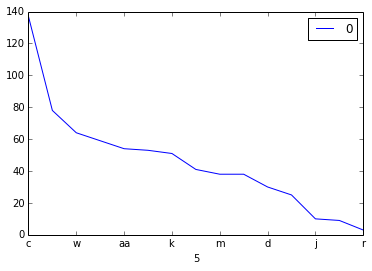

In [63]:
# There are also sum built-in plot functions
f[[0,5]].groupby([5]).count().sort([0], ascending = False).plot()

## Кодировки

In [64]:
with open('data/JCS/anna_utf8.txt','r') as f:
    lines = f.readlines()
lines[:24] # array of strings

['XIII\n',
 '\n',
 '  \n',
 '   \xd0\x9a\xd0\xb8\xd1\x82\xd0\xb8 \xd0\xb8\xd1\x81\xd0\xbf\xd1\x8b\xd1\x82\xd1\x8b\xd0\xb2\xd0\xb0\xd0\xbb\xd0\xb0 \xd0\xbf\xd0\xbe\xd1\x81\xd0\xbb\xd0\xb5 \xd0\xbe\xd0\xb1\xd0\xb5\xd0\xb4\xd0\xb0 \xd0\xb8 \xd0\xb4\xd0\xbe \xd0\xbd\xd0\xb0\xd1\x87\xd0\xb0\xd0\xbb\xd0\xb0 \xd0\xb2\xd0\xb5\xd1\x87\xd0\xb5\xd1\x80\xd0\xb0 \xd1\x87\xd1\x83\xd0\xb2\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe, \xd0\xbf\xd0\xbe\xd0\xb4\xd0\xbe\xd0\xb1\xd0\xbd\xd0\xbe\xd0\xb5 \xd1\x82\xd0\xbe\xd0\xbc\xd1\x83, \xd0\xba\xd0\xb0\xd0\xba\xd0\xbe\xd0\xb5 \xd0\xb8\xd1\x81\xd0\xbf\xd1\x8b\xd1\x82\xd1\x8b\xd0\xb2\xd0\xb0\xd0\xb5\xd1\x82 \xd1\x8e\xd0\xbd\xd0\xbe\xd1\x88\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4 \xd0\xb1\xd0\xb8\xd1\x82\xd0\xb2\xd0\xbe\xd1\x8e. \xd0\xa1\xd0\xb5\xd1\x80\xd0\xb4\xd1\x86\xd0\xb5 \xd0\xb5\xd0\xb5 \xd0\xb1\xd0\xb8\xd0\xbb\xd0\xbe\xd1\x81\xd1\x8c \xd1\x81\xd0\xb8\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe, \xd0\xb8 \xd0\xbc\xd1\x8b\xd1\x81\xd0\xbb\xd0\xb8 \xd0\xbd\xd0\xb5 \xd0\xbc\xd0\

In [65]:
with open('data/JCS/anna_windows1251.txt','r') as f:
    lines = f.readlines()
lines[:24] # array of strings

['XIII\n',
 '\n',
 '  \n',
 '   \xca\xe8\xf2\xe8 \xe8\xf1\xef\xfb\xf2\xfb\xe2\xe0\xeb\xe0 \xef\xee\xf1\xeb\xe5 \xee\xe1\xe5\xe4\xe0 \xe8 \xe4\xee \xed\xe0\xf7\xe0\xeb\xe0 \xe2\xe5\xf7\xe5\xf0\xe0 \xf7\xf3\xe2\xf1\xf2\xe2\xee, \xef\xee\xe4\xee\xe1\xed\xee\xe5 \xf2\xee\xec\xf3, \xea\xe0\xea\xee\xe5 \xe8\xf1\xef\xfb\xf2\xfb\xe2\xe0\xe5\xf2 \xfe\xed\xee\xf8\xe0 \xef\xf0\xe5\xe4 \xe1\xe8\xf2\xe2\xee\xfe. \xd1\xe5\xf0\xe4\xf6\xe5 \xe5\xe5 \xe1\xe8\xeb\xee\xf1\xfc \xf1\xe8\xeb\xfc\xed\xee, \xe8 \xec\xfb\xf1\xeb\xe8 \xed\xe5 \xec\xee\xe3\xeb\xe8 \xed\xe8 \xed\xe0 \xf7\xe5\xec \xee\xf1\xf2\xe0\xed\xee\xe2\xe8\xf2\xfc\xf1\xff.\n',
 '   \xce\xed\xe0 \xf7\xf3\xe2\xf1\xf2\xe2\xee\xe2\xe0\xeb\xe0, \xf7\xf2\xee \xed\xfb\xed\xe5\xf8\xed\xe8\xe9 \xe2\xe5\xf7\xe5\xf0, \xea\xee\xe3\xe4\xe0 \xee\xed\xe8 \xee\xe1\xe0 \xe2 \xef\xe5\xf0\xe2\xfb\xe9 \xf0\xe0\xe7 \xe2\xf1\xf2\xf0\xe5\xf7\xe0\xfe\xf2\xf1\xff, \xe4\xee\xeb\xe6\xe5\xed \xe1\xfb\xf2\xfc \xf0\xe5\xf8\xe8\xf2\xe5\xeb\xfc\xed\xfb\xe9 \xe2 \xe5\xe5 \x

In [66]:
import codecs
f = codecs.open('data/JCS/anna_utf8.txt', encoding='utf-8')
for line in f:
    print(line)

XIII



  

   Кити испытывала после обеда и до начала вечера чувство, подобное тому, какое испытывает юноша пред битвою. Сердце ее билось сильно, и мысли не могли ни на чем остановиться.

   Она чувствовала, что нынешний вечер, когда они оба в первый раз встречаются, должен быть решительный в ее судьбе. И она беспрестанно представляла себе их, то каждого порознь, то вместе обоих. Когда она думала о прошедшем, она с удовольствием, с нежностью останавливалась на воспоминаниях своих отношений к Левину. Воспоминания детства и воспоминания о дружбе Левина с ее умершим братом придавали особенную поэтическую прелесть ее отношениям с ним. Его любовь к ней, в которой она была уверена, была лестна и радостна ей. И ей легко было вспомнить о Левине. В воспоминание же о Вронском примешивалось что-то неловкое, хотя он был в высшей степени светский и спокойный человек; как будто фальшь какая-то была, -- не в нем, он был очень прост и мил, -- но в ней самой, тогда как с Левиным она чувствовала себя с

In [67]:
f = codecs.open('data/JCS/anna_windows1251.txt', encoding='windows-1251')
for line in f:
    print(line)

XIII



  

   Кити испытывала после обеда и до начала вечера чувство, подобное тому, какое испытывает юноша пред битвою. Сердце ее билось сильно, и мысли не могли ни на чем остановиться.

   Она чувствовала, что нынешний вечер, когда они оба в первый раз встречаются, должен быть решительный в ее судьбе. И она беспрестанно представляла себе их, то каждого порознь, то вместе обоих. Когда она думала о прошедшем, она с удовольствием, с нежностью останавливалась на воспоминаниях своих отношений к Левину. Воспоминания детства и воспоминания о дружбе Левина с ее умершим братом придавали особенную поэтическую прелесть ее отношениям с ним. Его любовь к ней, в которой она была уверена, была лестна и радостна ей. И ей легко было вспомнить о Левине. В воспоминание же о Вронском примешивалось что-то неловкое, хотя он был в высшей степени светский и спокойный человек; как будто фальшь какая-то была, -- не в нем, он был очень прост и мил, -- но в ней самой, тогда как с Левиным она чувствовала себя с

## Kaggle "Digit Recognizer"

### Imports

In [68]:
train = pd.read_csv('data/digit_recognizer/train.csv')
# Basic train dataset contains: 42 000 examples
# It will take too long to processs this data during the class
# Black Magic
train = train[:4200].sort('label')

In [69]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
train.groupby('label')['label'].count()

label
0    425
1    460
2    454
3    386
4    409
5    398
6    436
7    427
8    404
9    401
Name: label, dtype: int64

In [71]:
X_train = np.asarray(train[range(1,785)])
Y_train = np.asarray(train[[0]]).ravel()

In [72]:
X_train.shape, Y_train.shape

((4200, 784), (4200,))

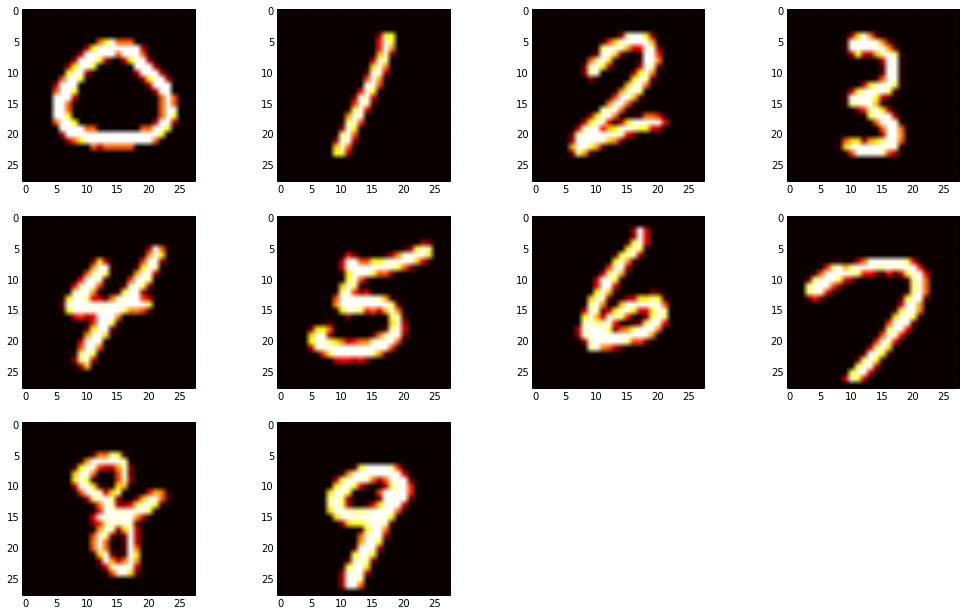

In [73]:
example_ids = sort([
    3023, 323, 945, 3807, 1415,
    2664, 647, 3453, 1856, 2285
])
fig = pyplot.gcf()
fig.set_size_inches(17.5,10.5)
for pylab_index, example_id in enumerate(example_ids):
    pylab.subplot(3, 4, pylab_index + 1)
    pylab.imshow(X_train[example_id,:].reshape(28,28), cmap='hot')

## Cross Validation

In [74]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics.accuracy_score

In [75]:
estimator = KNeighborsClassifier(algorithm='ball_tree')

In [76]:
def print_accuracy(estimator, cv_strategy, print_indices=False, print_score=False):
    for train_indices, test_indices in cv_strategy:
        if print_indices:
            print train_indices, test_indices
        estimator.fit(X_train[train_indices], Y_train[train_indices])
        if print_score:
            print estimator.score(X_train[test_indices], Y_train[test_indices])

In [77]:
print_accuracy(estimator, KFold(X_train.shape[0], n_folds=3), print_indices=True, print_score=False)

[1400 1401 1402 ..., 4197 4198 4199] [   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 4197 4198 4199] [1400 1401 1402 ..., 2797 2798 2799]
[   0    1    2 ..., 2797 2798 2799] [2800 2801 2802 ..., 4197 4198 4199]


In [88]:
print_accuracy(estimator, StratifiedKFold(Y_train, n_folds=3), print_indices=False, print_score=True)

0.906761565836
0.921428571429
0.900358422939


In [80]:
print_accuracy(estimator, ShuffleSplit(X_train.shape[0], test_size=0.1, n_iter=3), print_indices=False, print_score=True)

0.902380952381
0.92619047619
0.916666666667


In [82]:
for train_indices, test_indices in KFold(10, n_folds=2, shuffle=True):
    print train_indices, test_indices

[1 2 5 7 8] [0 3 4 6 9]
[0 3 4 6 9] [1 2 5 7 8]


In [84]:
y = np.array([0] * 5 + [1] * 5)
print y
for train_indices, test_indices in StratifiedKFold(y, n_folds=2):
    print train_indices, test_indices

[0 0 0 0 0 1 1 1 1 1]
[3 4 8 9] [0 1 2 5 6 7]
[0 1 2 5 6 7] [3 4 8 9]


In [85]:
y = np.array([0, 1] * 5)
print y
for train_indices, test_indices in StratifiedKFold(y, n_folds=2):
    print train_indices, test_indices

[0 1 0 1 0 1 0 1 0 1]
[6 7 8 9] [0 1 2 3 4 5]
[0 1 2 3 4 5] [6 7 8 9]


In [86]:
y = np.array([0,1,1] * 5)
y = np.array([0] * 5 + [1] * 5)
print y
for train_indices, test_indices in StratifiedKFold(y, n_folds=2):
#for train_indices, test_indices in KFold(len(y), n_folds=2):
    print y[train_indices], y[test_indices]

[0 0 0 0 0 1 1 1 1 1]
[0 0 1 1] [0 0 0 1 1 1]
[0 0 0 1 1 1] [0 0 1 1]


In [87]:
for train_indices, test_indices in ShuffleSplit(10, n_iter=2, test_size=0.5):
    print train_indices, test_indices

[3 2 0 6 1] [8 9 5 7 4]
[5 6 0 3 8] [9 2 7 4 1]
